In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse
from astropy.io import ascii, fits
#from astropy.modeling import fitting, FittableModel, Fittable2DModel, Fittable1DModel, Parameter, custom_model
from astropy import wcs
from lmfit import minimize, Minimizer, report_fit, Model, Parameters
import lmfit
import pandas as pd
from ipywidgets import FloatProgress
from IPython.display import display
from MUSE_Models import MUSE_3D_OIII, MUSE_3D_residual, PNextractor
import sep
from photutils import CircularAperture

%config InlineBackend.figure_format = 'retina'

In [13]:
hdulist = fits.open("FCC170_data/FCC170_residuals.fits")
hdr = hdulist[0].header
raw_data = hdulist[0].data
y_data = hdr["NAXIS2"]
x_data = hdr["NAXIS1"]
wavelength = np.exp(hdulist[1].data)

# Open Fits file and assign to raw_data
hdulist_2D = fits.open("FCC170_data/FCC170_reconstructed_image.fits")
flat_2D_data = hdulist_2D[0].data

#hdulist = fits.open("FCC170_data/FCC170_pablo/FCC170_residuals.fits")
#raw_data = hdulist[0].data
#hdr = hdulist[0].header

#wavelength = hdr["CRVAL3"]+np.arange(hdr["NAXIS3"])*hdr["CDELT3"]

#y_data = hdr["NAXIS2"]
#x_data = hdr["NAXIS1"]

coordinates = [(n,m) for n in range(x_data) for m in range(y_data)]

x_fit = np.array([item[0] for item in coordinates])
y_fit = np.array([item[1] for item in coordinates])

raw_data_list_for_swap = np.array(raw_data).reshape(len(wavelength),x_data*y_data)
raw_data_list = np.swapaxes(raw_data_list_for_swap, 1, 0)


<Figure size 432x288 with 0 Axes>

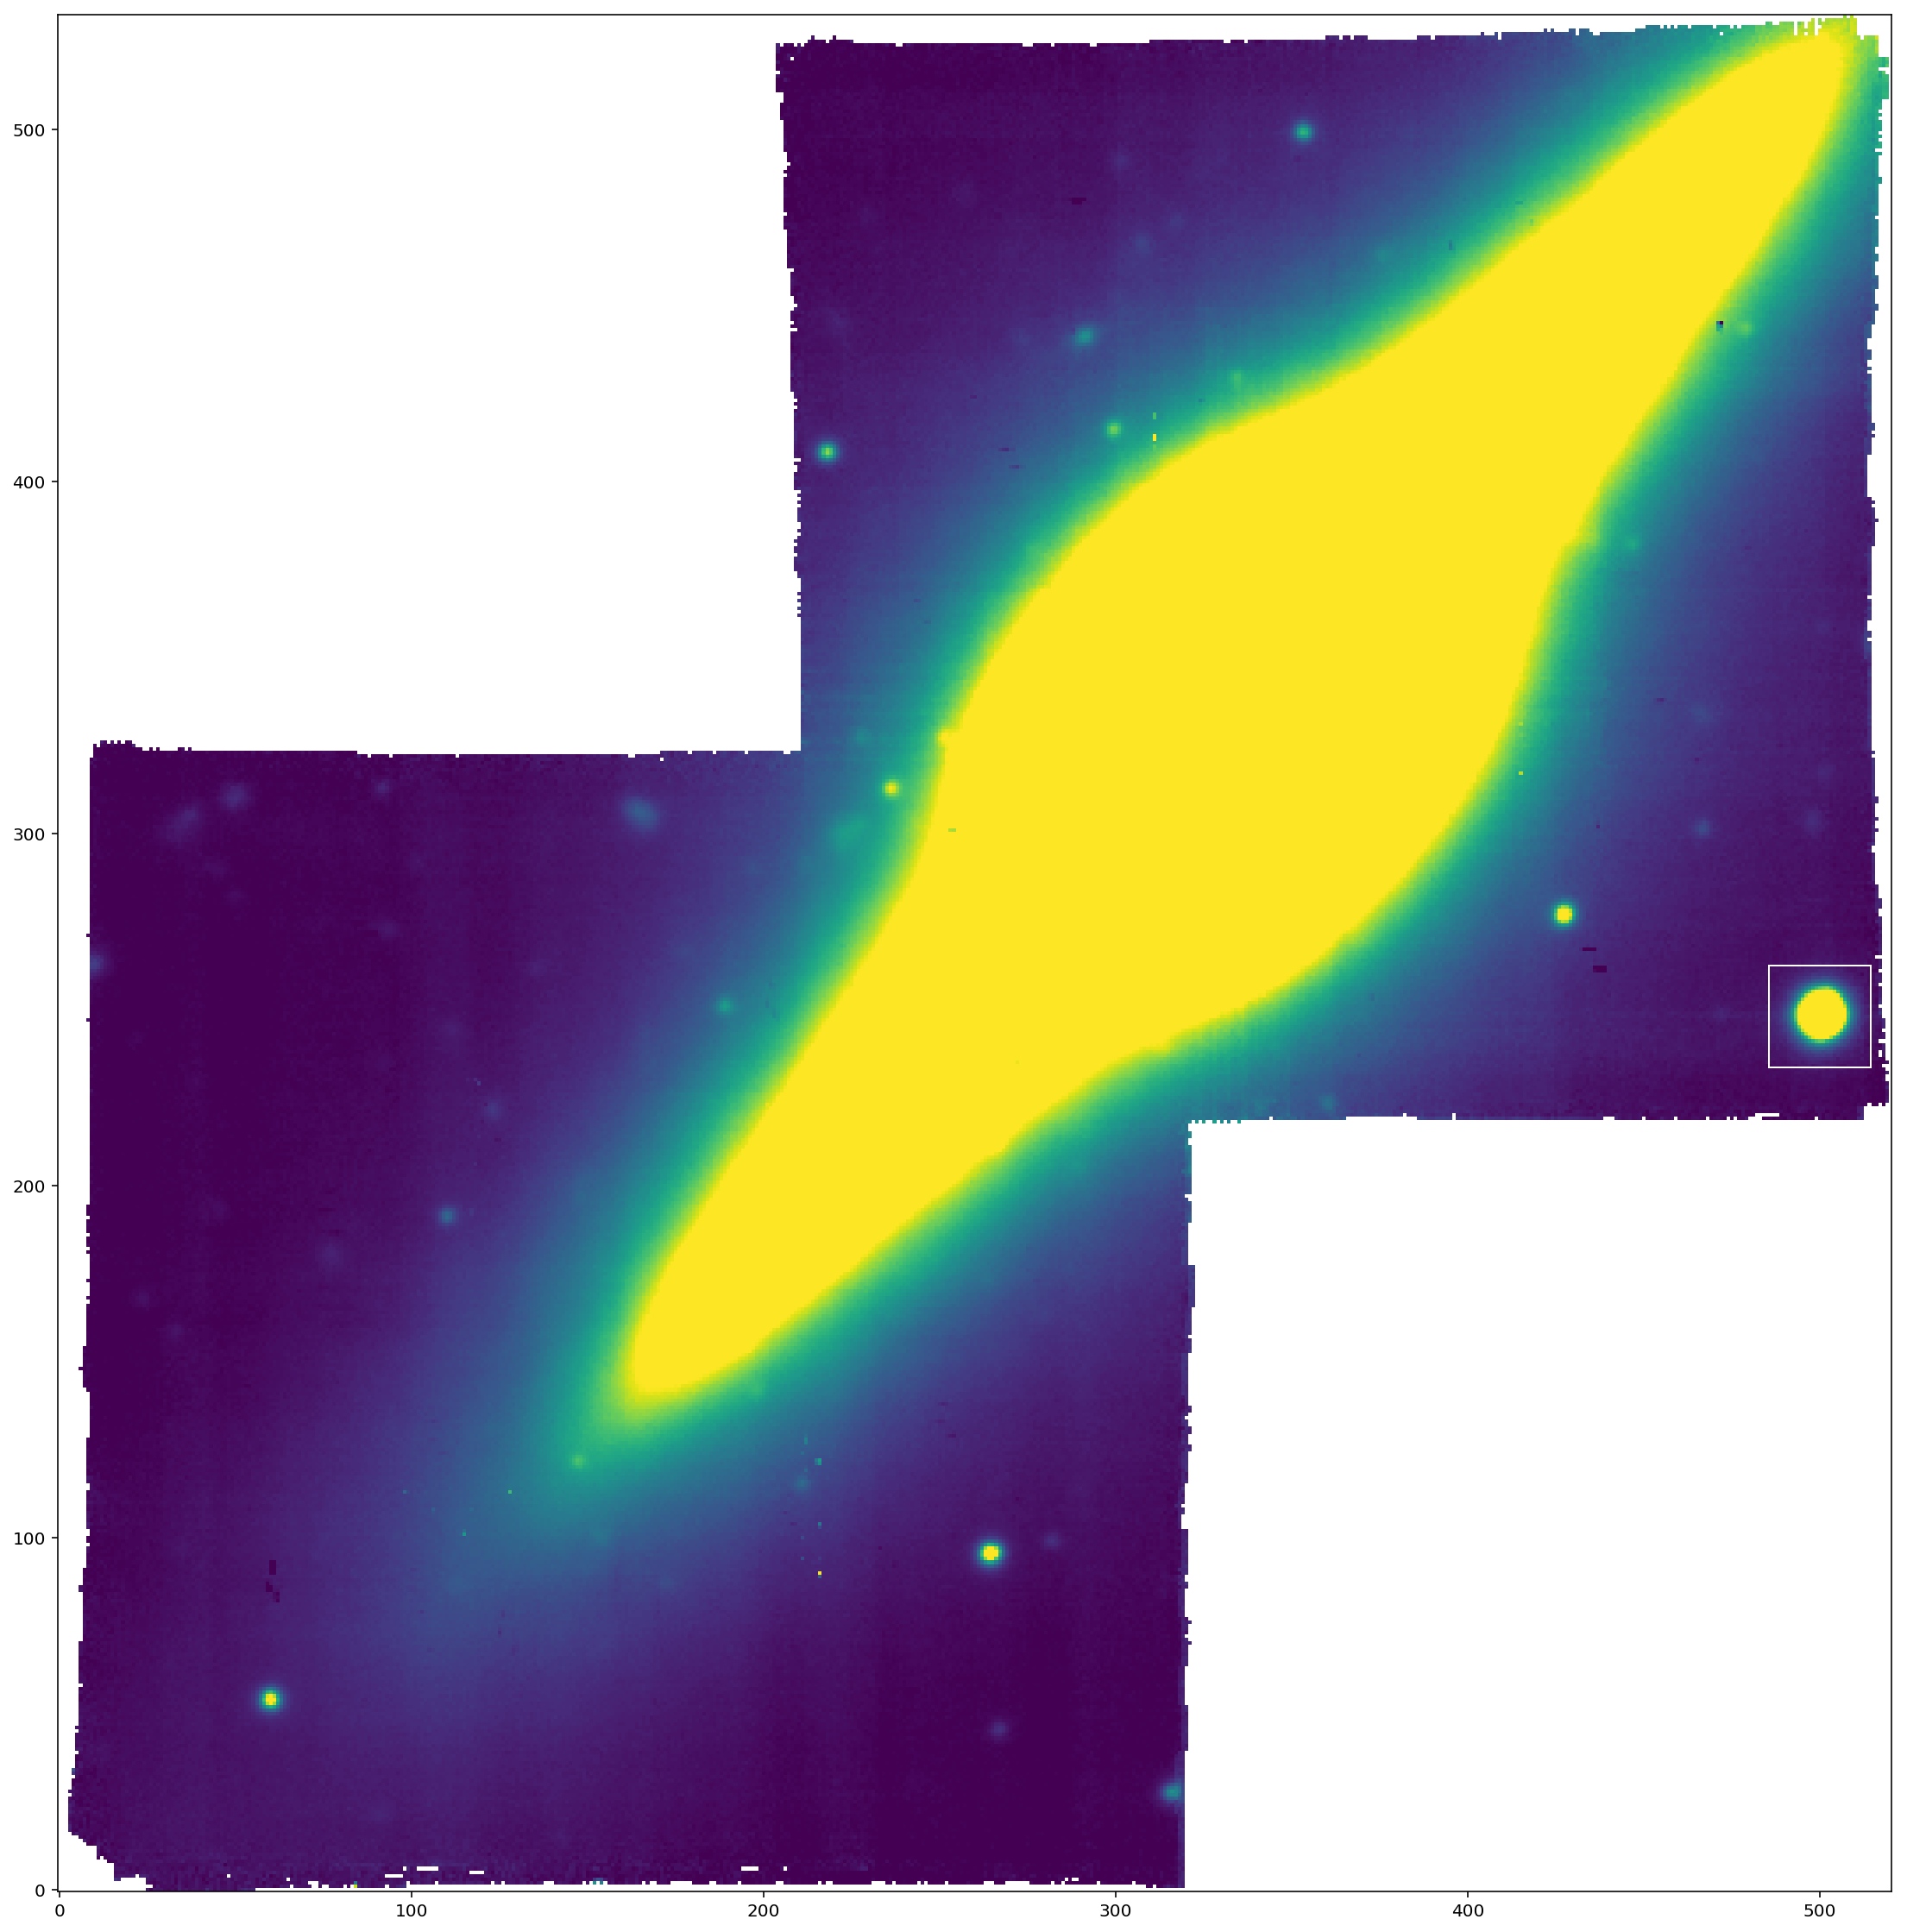

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize=(20,20))
plt.imshow(flat_2D_data, origin="lower", vmin=0, vmax=20000)

n_pix = 29
x=500
y=248
# select the spectra of interest
star_img = PNextractor(500,248,n_pix, flat_2D_data)
ax = plt.gca()
ax.add_patch(Rectangle((x-n_pix/2, y-n_pix/2), n_pix, n_pix, fill=False, edgecolor="white"))
plt.draw()
plt.figure(2)
#plt.imshow(test_spec, origin="lower", vmin=0, vmax=20000)

In [23]:
list_of_PNe_x_y_pablo = [
[133.6872,  119.9311], 
[ 31.7484,   18.0857], 
[ 50.3221,    9.6885], 
[256.4551,  281.7257], 
[268.9719,  267.1401], 
[269.7740,  273.5175], 
[265.0795,  272.7866], 
[221.6717,  261.9673], 
[178.0695,  253.2816], 
[276.9604,  252.4631], 
[237.9114,  240.1493], 
[242.2725,  231.5931], 
[250.3340,  238.1095], 
[201.1472,  232.9480], 
[212.7362,  226.8113], 
[233.0605,  223.5309], 
[213.2359,  215.7843], 
[218.5330,  213.6679], 
[225.5528,  208.6278], 
[200.0249,  204.9630], 
[187.7024,  201.0847], 
[216.5384,  201.8386], 
[279.1778,  195.7534], 
[217.9667,  196.0145], 
[204.2139,  191.8524], 
[194.1134,  186.4902], 
[241.3546,  191.6935], 
[ 95.3106,  189.2332], 
[258.6205,  185.7262], 
[176.4997,  183.5149], 
[166.7009,  181.6735], 
[168.1450,  177.9187], 
[153.6390,  173.3185], 
[183.1046,  171.7598], 
[191.2590,  168.6962], 
[186.9485,  165.7094], 
[166.5712,  164.0049], 
[175.1306,  164.1226], 
[142.8719,  172.8985], 
[104.4825,  173.3645], 
[138.7698,  164.6751], 
[127.2775,  167.4624], 
[131.9054,  166.6136], 
[121.0014,  162.7764], 
[182.9748,  159.2644], 
[145.5961,  158.4469], 
[154.1929,  156.0776], 
[118.5754,  158.8082], 
[128.3612,  154.0580], 
[112.6508,  150.6379], 
[162.4274,  148.6222], 
[103.0846,  102.5301], 
[ 93.0444,   97.4497], 
[115.7311,   85.6683], 
[150.5266,  112.4927], 
[110.8764,  110.8257], 
[283.4023,  309.5461], 
[158.4814,  145.6119], 
[166.2331,  142.2690], 
[170.5464,  140.4841], 
[170.2375,  136.1910], 
[162.2199,  129.9268], 
[162.6546,  125.7569], 
[166.2286,  123.5235], 
[187.7252,  139.8364], 
[181.7425,  140.0984], 
[ 85.5607,  135.5166], 
[105.9718,  130.7453], 
[215.2929,  128.6275], 
[159.5625,  115.6874], 
[ 58.7886,  112.3186], 
[176.9330,  110.9228], 
[152.8312,  102.4903], 
[163.9366,   99.8901], 
[ 83.3764,  100.3154], 
[158.4501,   93.3949], 
[106.7922,   92.8781], 
[ 84.9605,   84.4684], 
[127.6335,  109.8748], 
[165.9264,   84.2578], 
[136.8278,   74.8607], 
[100.1994,   77.9368], 
[ 95.9933,   77.7738], 
[127.4130,   72.2061], 
[106.5338,   67.5557], 
[ 94.3060,   70.4408], 
[ 84.2235,   65.1015], 
[149.6993,   63.9423], 
[ 28.3685,   64.2971], 
[ 67.2784,   61.9829], 
[ 91.4423,   50.9757], 
[ 81.3548,   55.1022], 
[ 83.6070,   51.1772], 
[ 86.3643,   49.6796], 
[195.1935,   53.0509], 
[ 63.6300,   48.2632], 
[ 45.1176,   46.8019], 
[ 33.4807,   30.5582], 
[ 44.3904,   35.2370], 
[ 40.8421,   34.6519], 
[ 44.4888,   28.0387], 
[ 75.8519,   23.8876], 
[ 58.7962,   22.9879], 
[276.9858,  299.4825] 
]

np.save("FCC170_data/x_y_list_pablo", list_of_PNe_x_y_pablo)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 841
    # variables        = 6
    chi-square         = 1.2676e+10
    reduced chi-square = 15180550.5
    Akaike info crit   = 13912.3555
    Bayesian info crit = 13940.7631
[[Variables]]
    moff_amp:  924007.984 +/- 2427.14726 (0.26%) (init = 900000)
    x_0:       14.4889020 +/- 0.00367525 (0.03%) (init = 14.5)
    y_0:       14.4519557 +/- 0.00367526 (0.03%) (init = 14.5)
    FWHM:      3.99881759 +/- 0.01039958 (0.26%) (init = 6)
    beta:      2.58571842 +/- 0.03610524 (1.40%) (init = 6)
    bkg:       1286.07099 +/- 184.870748 (14.37%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(moff_amp, FWHM) = -0.843
    C(FWHM, beta)     =  0.740
    C(beta, bkg)      =  0.589
    C(moff_amp, beta) = -0.585
    C(moff_amp, bkg)  = -0.288
    C(FWHM, bkg)      =  0.247
None
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 95
    # 

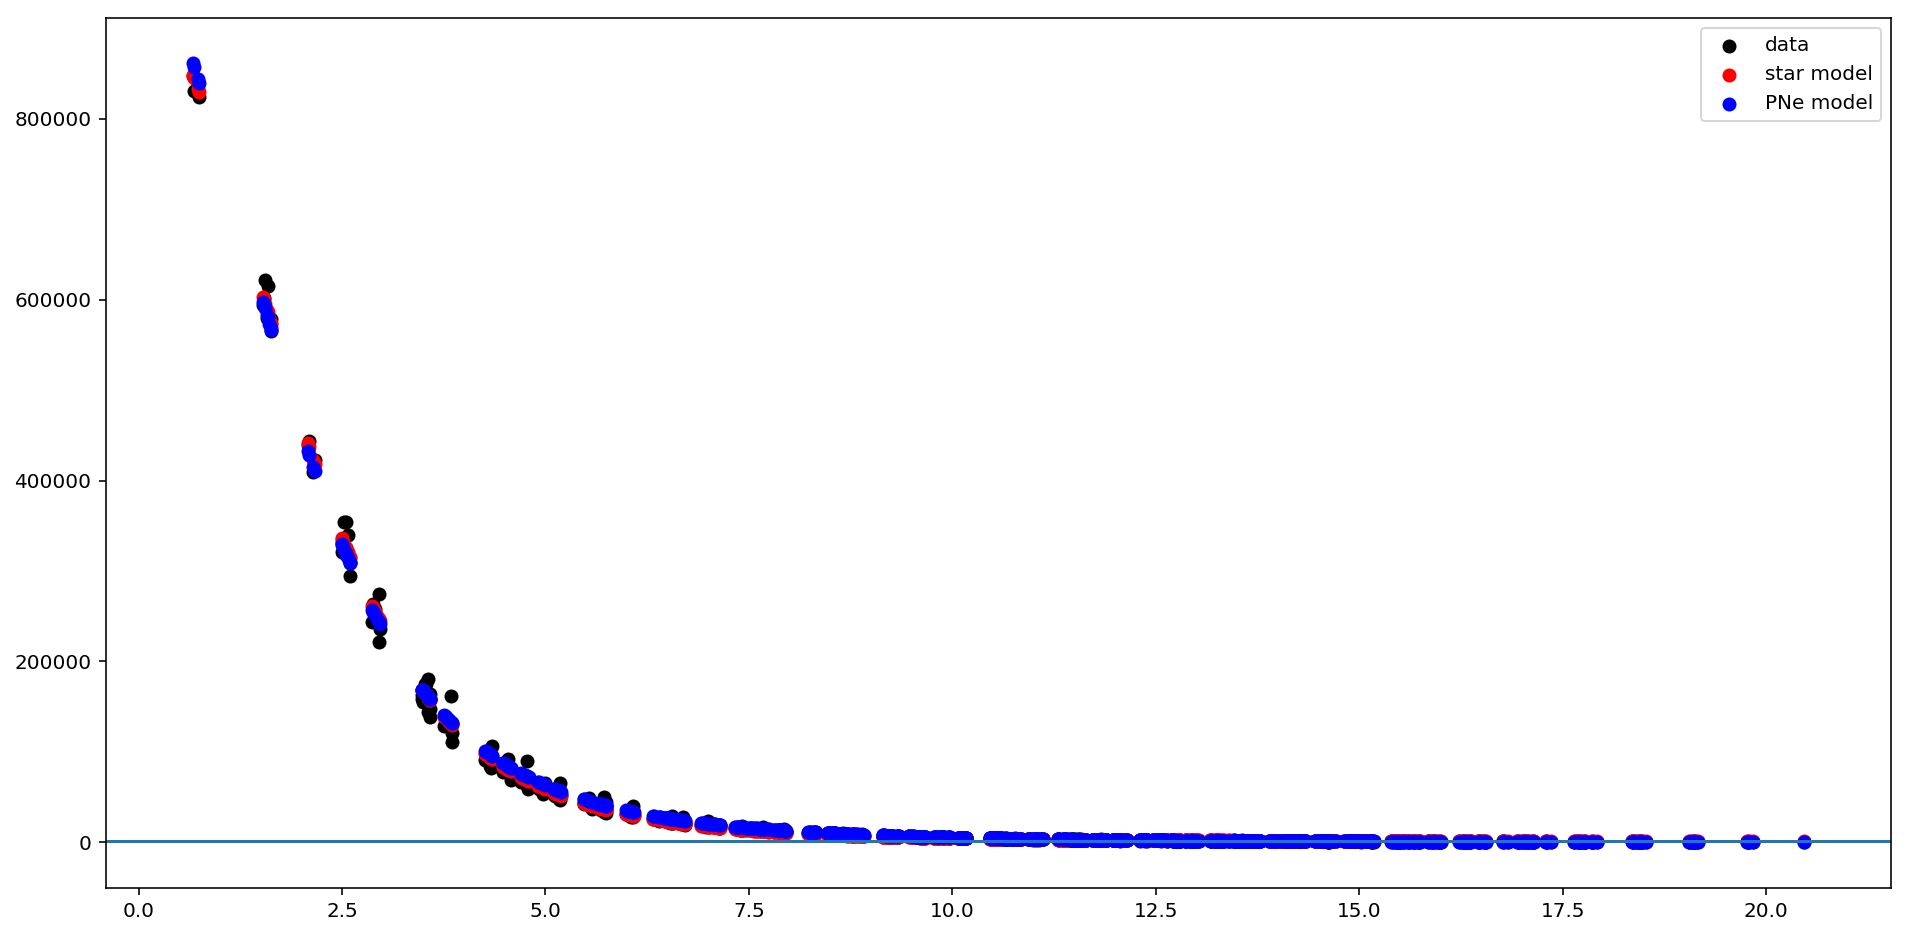

In [20]:
# 1D fit - LMfit
X_AOI, Y_AOI = np.mgrid[:n_pix,:n_pix]

coordinates = [(n,m) for n in range(n_pix) for m in range(n_pix)]

x_fit = np.array([item[0] for item in coordinates])
y_fit = np.array([item[1] for item in coordinates])

#list_of_residuals = np.zeros(len())
list_of_flux = []

def residuals(params, x_2D, y_2D, data):
    moff_amp = params["moff_amp"]
    x_0 = params["x_0"]
    y_0 = params["y_0"]
    FWHM = params["FWHM"]
    beta = params["beta"]
    bkg = params["bkg"]

    gamma = FWHM / (2. * np.sqrt(2.**(1./beta) - 1.))
    rr_gg = ((np.array(x_2D) - x_0)**2 + (np.array(y_2D) - y_0)**2) / gamma**2
    model = moff_amp * (1 + rr_gg)**(-beta) + bkg
    list_of_flux.clear()
    list_of_flux.append(model)
    #list_of_residuals[spec_num] = np.std(data - model)
    
    return data - model #/ np.std(flatten(data))

# Star initial parameters
S_params = Parameters()
S_params.add('moff_amp', value=900000., min=0.0001)
S_params.add('x_0', value=(n_pix/2), min=0001., max=n_pix)
S_params.add('y_0', value=(n_pix/2), min=0001., max=n_pix)
S_params.add('FWHM', value=6., min=0.001, max=12., vary=True)
S_params.add("beta", value=6., min=0.001, max=12., vary=True)
S_params.add("bkg", value=0.1, min=0.00001, max=10000, vary=True)

#list_of_std = [np.abs(np.std(spec)) for spec in flat_raw_data]
#input_errors = [np.repeat(list_of_std[i], len(wavelength)) for i in np.arange(0,len(list_of_std))]

S_results = minimize(residuals, S_params, args=(x_fit, y_fit, star_img), nan_policy="propagate")
print(report_fit(S_results))
star_model = list_of_flux

# PNe initial Parameters
P_params = Parameters()
P_params.add('moff_amp', value=900000., min=0.0001)
P_params.add('x_0', value=(n_pix/2), min=0001., max=n_pix)
P_params.add('y_0', value=(n_pix/2), min=0001., max=n_pix)
P_params.add('FWHM', value=4.083, min=0.001, max=12., vary=True)
P_params.add("beta", value=2.122, min=0.001, max=12., vary=False)
P_params.add("bkg", value=100, min=0.00001, max=10000, vary=True)
#S_results.params["bkg"].value
#FWHM:  4.08291829123 0.106292926432
#Beta:  2.12207462875 0.195897897074


P_results = minimize(residuals, P_params, args=(x_fit, y_fit, star_img), nan_policy="propagate")
print(report_fit(P_results))
PNe_model = list_of_flux


PNe_residuals = residuals(P_results.params, x_fit, y_fit, star_img)
PNe_model = star_img - PNe_residuals

star_residuals = residuals(S_results.params, x_fit, y_fit, star_img)
star_model = star_img - star_residuals

rad= np.sqrt((x_fit - S_results.params["x_0"])**2 + (y_fit - S_results.params["y_0"])**2)
plt.figure(figsize=(16,8))
plt.scatter(rad, star_img, color="k", label="data")
plt.scatter(rad, star_model, color="r", label="star model")
plt.scatter(rad, PNe_model, color="blue", label="PNe model")
plt.axhline(1331)
plt.legend()

In [21]:
print("Star: ", np.sum(star_model))
print("PNe:  ", np.sum(PNe_model) - 1286.07099)
print("Diff: ", np.abs(np.sum(star_model)-np.sum(PNe_model)))

Star:  24688186.47954396
PNe:   25086605.614826594
Diff:  399705.2062726319


In [17]:
# Change data dimensions to wave, x*y
list_of_raw_data = np.array(raw_data).reshape(len(wavelength),x_data*y_data)
# Swap axes to x*y, wave
list_of_raw_data = np.swapaxes(list_of_raw_data, 1, 0)
# set nan values to 0.001
list_of_raw_data[np.isnan(list_of_raw_data)]=0.001
# Calculate errors from std of each spectrum
list_of_std = [np.abs(np.nanstd(spec)) for spec in list_of_raw_data]
input_errors = [np.repeat(list_of_std[i], len(wavelength)) for i in np.arange(0,len(list_of_std))]

non_zero_index = np.squeeze(np.where(raw_data_list[:,0] != 0.))

In [20]:
len(list_of_raw_data)

102080

# 1D fitter

In [21]:
def Gaussian_1D_res(params, x, data, error, spec_num):
    Amp = params["Amp"]
    mean = params["mean"]
    FWHM = params["FWHM"]
    Gauss_bkg = params["Gauss_bkg"]
    Gauss_grad = params["Gauss_grad"]
     
    Gauss_std = FWHM / 2.35482
    model = ((Gauss_bkg + Gauss_grad * x) + Amp * np.exp(- 0.5 * (x - mean)** 2 / Gauss_std**2.) +
             (Amp/3.) * np.exp(- 0.5 * (x - (mean - 47.9399))** 2 / Gauss_std**2.))
    
    list_of_rN[spec_num] = np.std(data - model)
    list_of_residuals[spec_num] = data - model
    
    return (data - model) / error


params = Parameters()
params.add("Amp",value=50., min=0.001, max=300.)
params.add("mean", value=5035., min=5000., max=5070.)
params.add("FWHM", value=2.81, vary=False) # LSF
params.add("Gauss_bkg", value=0.001, min=-500., max=500.)
params.add("Gauss_grad", value=0.001)

list_of_std = np.array([np.abs(np.std(spec)) for spec in raw_data_list])
input_errors = [np.repeat(list_of_std[i], len(wavelength)) for i in np.arange(0,len(list_of_std))]

list_of_rN = np.zeros(len(raw_data_list))
list_of_residuals = np.zeros((len(raw_data_list),len(wavelength)))
list_of_residuals_from_fitter = np.zeros((len(raw_data_list),len(wavelength)))
best_fit_A = np.zeros((len(raw_data_list),2))
best_fit_mean = np.zeros((len(raw_data_list),2))


In [ ]:
for i,spectra in enumerate(raw_data_list):
    results = minimize(Gaussian_1D_res, params, args=(wavelength, spectra, input_errors[i], i), nan_policy="propagate")
    best_fit_A[i] = [results.params["Amp"], results.params["Amp"].stderr]
    best_fit_mean[i] = [results.params["mean"], results.params["mean"].stderr]
    list_of_residuals_from_fitter[i] = results.residual

In [ ]:
gauss_A = [A[0] for A in best_fit_A]
A_err = [A[1] for A in best_fit_A]

A_rN = np.array([A / rN for A,rN in zip(gauss_A, list_of_rN)])
A_rN_shape = A_rN.reshape(y_data,x_data)

Gauss_F = np.array(gauss_A) * np.sqrt(2*np.pi) * 1.19
Gauss_F_shape = Gauss_F.reshape(y_data, x_data)

In [ ]:
np.save("exported_data/FCC170/A_rN_cen", A_rN)
np.save("exported_data/FCC170/gauss_A_cen", gauss_A)
np.save("exported_data/FCC170/gauss_A_err_cen", A_err)
np.save("exported_data/FCC170/gauss_F_cen", Gauss_F)
np.save("exported_data/FCC170/list_of_resids_min_cen", list_of_residuals)
np.save("exported_data/FCC170/list_of_resids_min_obj_cen", list_of_residuals_from_fitter)
np.save("exported_data/FCC170/rN_cen", list_of_rN)

In [14]:
A_rN = np.load("exported_data/FCC170/A_rN_cen.npy")
A_rN_shape = A_rN.reshape(y_data,x_data)

gauss_A = np.load("exported_data/FCC170/gauss_A_cen.npy")
gauss_A_shape = np.array(gauss_A).reshape(y_data,x_data)

gauss_A_err = np.load("exported_data/FCC170/gauss_A_err_cen.npy")
gauss_A_err_shape = gauss_A_err.reshape(y_data, x_data)

gauss_F = np.load("exported_data/FCC170/gauss_F_cen.npy")
gauss_F_shape = np.array(gauss_F).reshape(y_data,x_data)

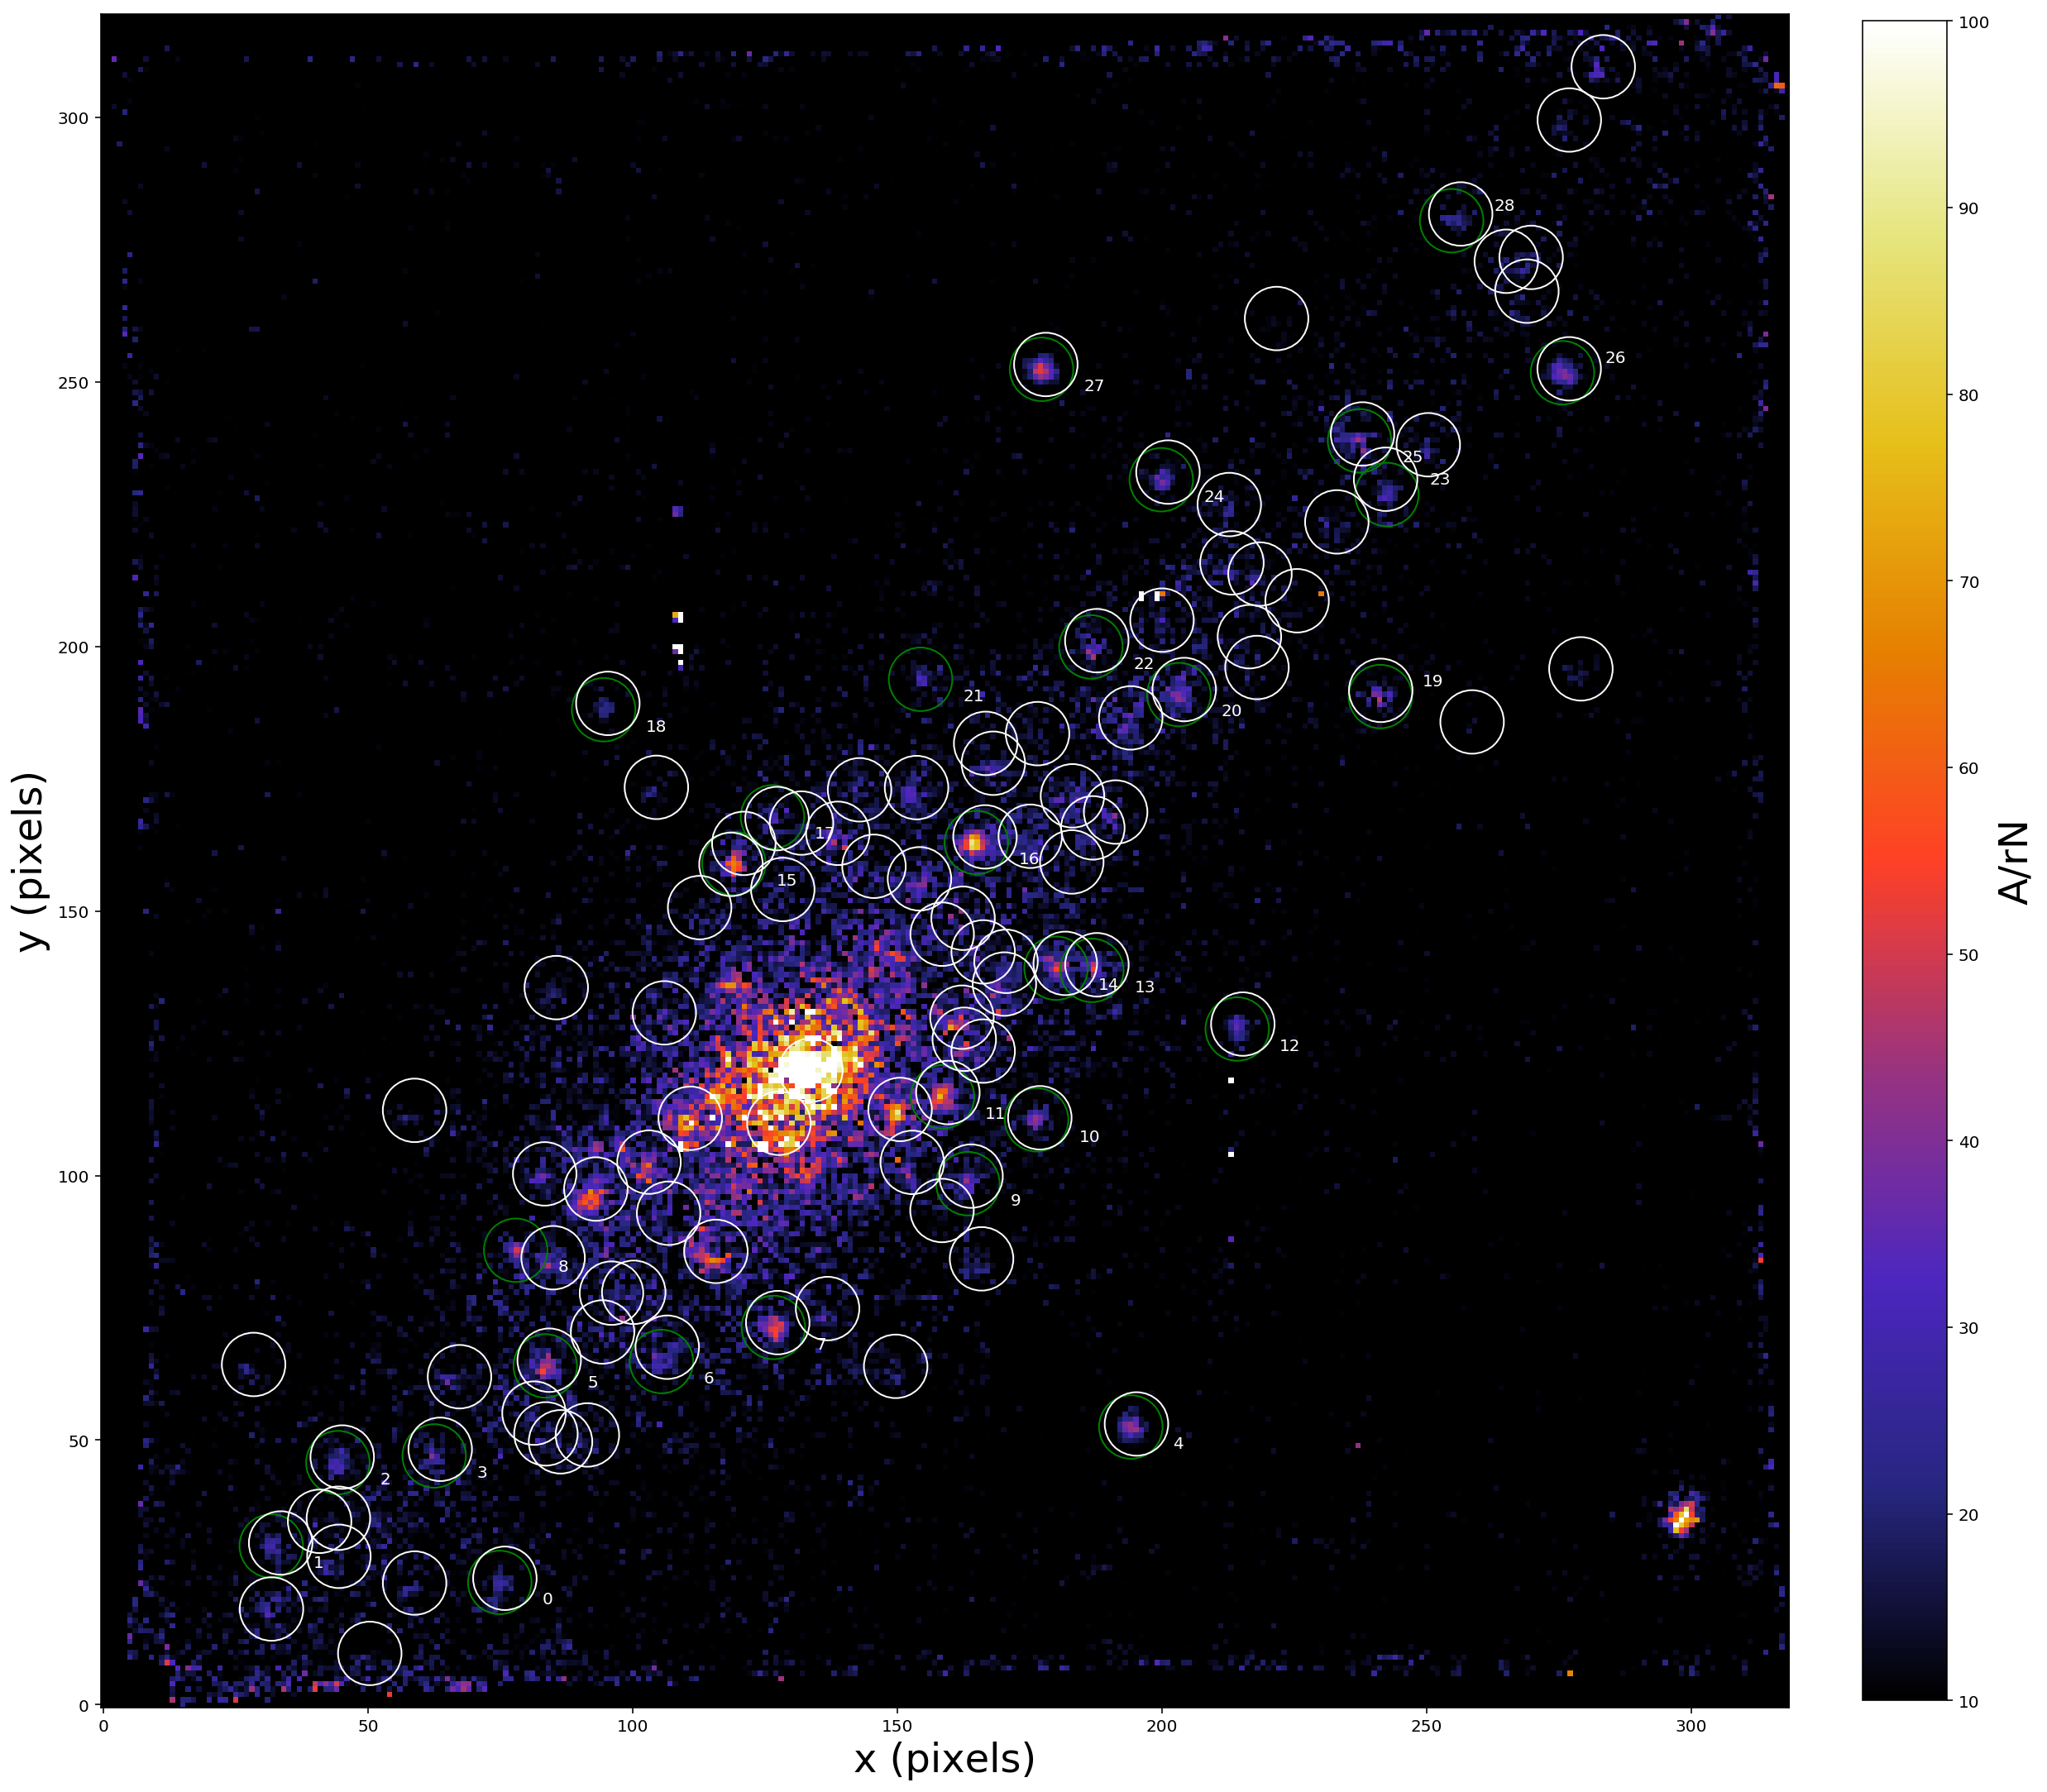

In [27]:
plt.figure(figsize=(20,20))
plt.imshow(gauss_A_shape, origin="lower", cmap="CMRmap", vmin=10, vmax=100)
ax = plt.gca()
cb=plt.colorbar(fraction=0.0455, pad=0.04)
cb.set_label("A/rN",fontsize=24)
#cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=20)
plt.xlabel("x (pixels)", fontsize=24)
plt.ylabel("y (pixels)", fontsize=24)
#circ_r = plt.Circle((x_data/2.,y_data/2.), 80, color="white", fill=False)
#ax.add_artist(circ_r)
x_y_list = np.load("exported_data/FCC170/x_y_list_cen.npy")

for i, item in enumerate(x_y_list):
    ax = plt.gca()
    circ = plt.Circle((item[0],item[1]),6, color="green", fill=False)
    ax.add_artist(circ)
    if item[0]<240.:
        ax.annotate(i, (item[0]+8, item[1]-4), color="white", size=10)
    else:
        ax.annotate(i, (item[0]+8, item[1]+2), color="white", size=10)

        
x_y_list_p = np.load("FCC170_data/x_y_list_pablo.npy")

for i, item in enumerate(x_y_list_p):
    ax = plt.gca()
    circ = plt.Circle((item[0],item[1]),6, color="white", fill=False)
    ax.add_artist(circ)
    #if item[0]<240.:
    #    ax.annotate(i, (item[0]+8, item[1]-4), color="white", size=10)
    #else:
    #    ax.annotate(i, (item[0]+8, item[1]+2), color="white", size=10)
#plt.axhline(35)
#plt.axvline(298)
plt.savefig("Plots/FCC170/FCC170_A_x_y_comp.png")

In [4]:
star_for_psf = PNextractor(298, 35, 15, gauss_A_shape)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 56
    # data points      = 225
    # variables        = 5
    chi-square         = 22298.7419
    reduced chi-square = 101.357918
    Akaike info crit   = 1044.14166
    Bayesian info crit = 1061.22216
[[Variables]]
    moff_amp:  165.102874 +/- 5.69327378 (3.45%) (init = 100)
    x_0:       7.37378106 +/- 0.05345981 (0.72%) (init = 7.5)
    y_0:       7.19406334 +/- 0.05345866 (0.74%) (init = 7.5)
    FWHM:      4.33433468 +/- 0.15432932 (3.56%) (init = 3)
    beta:      2.42697857 +/- 0.38706396 (15.95%) (init = 3)
    bkg:       1e-05 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(moff_amp, FWHM) = -0.841
    C(FWHM, beta)     =  0.780
    C(moff_amp, beta) = -0.561
None
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 225
    # variables        = 3
    chi-square         = 26253.8565
    reduced chi-square = 118.260615
    Akaik

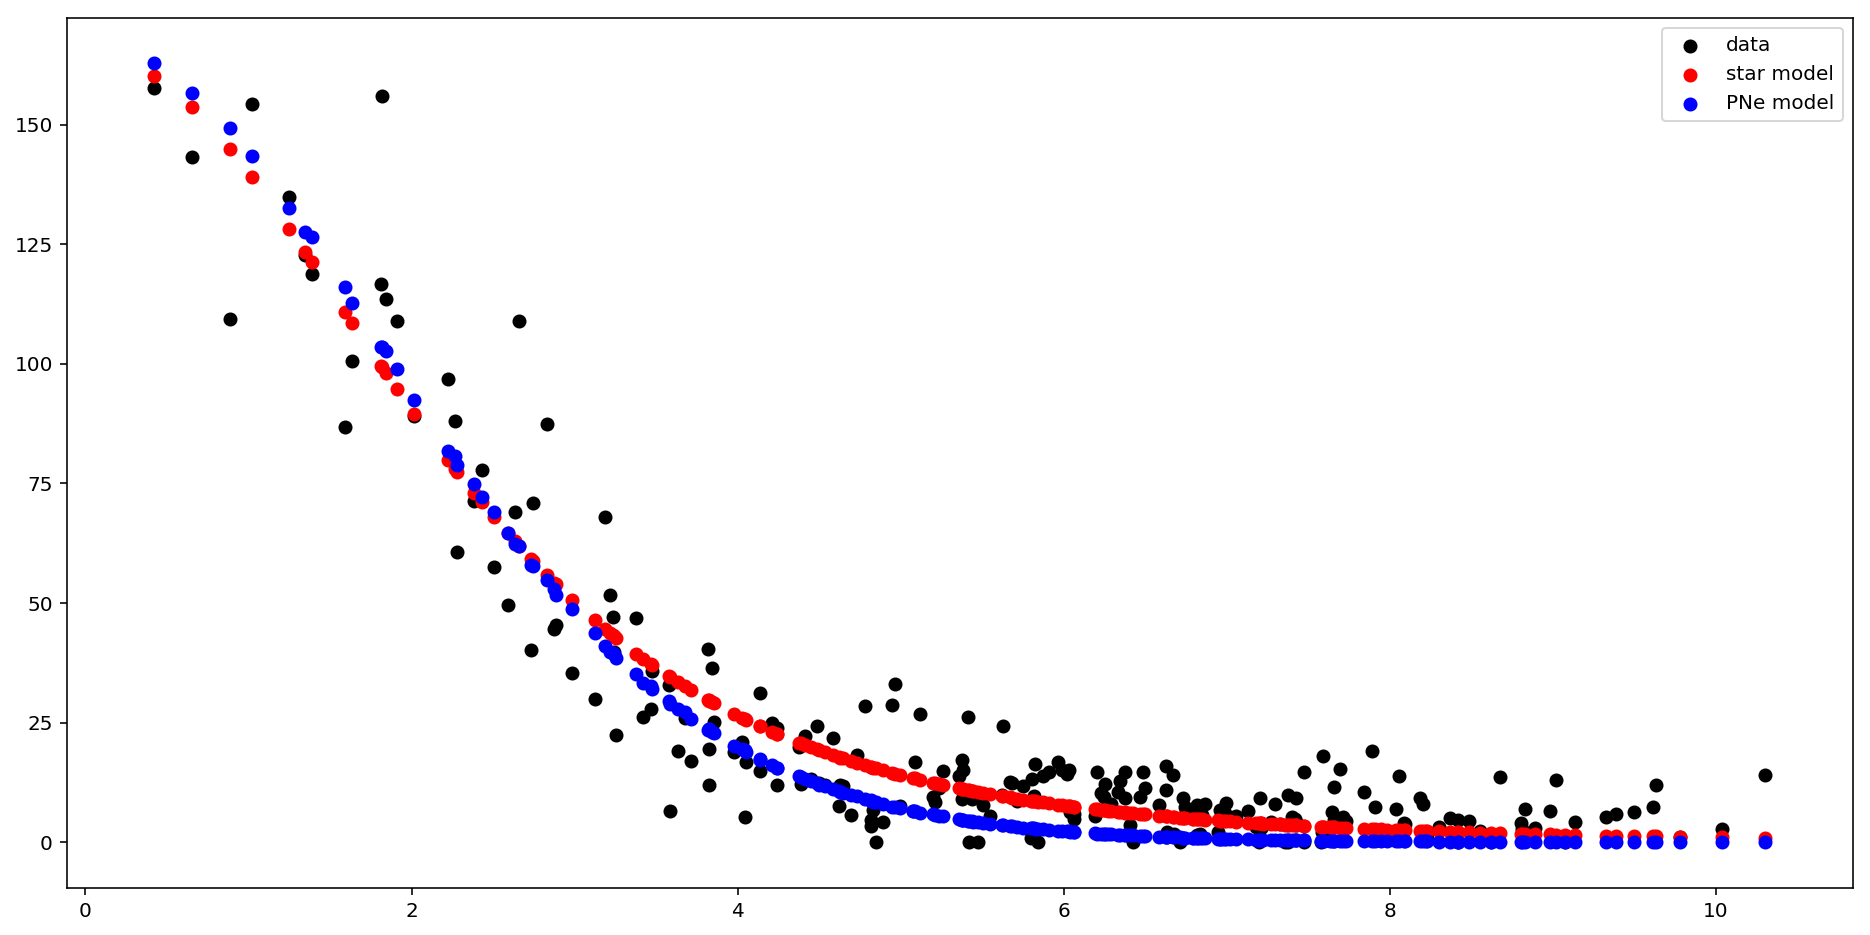

In [56]:
# 1D fit - LMfit
n_pix=15
X_AOI, Y_AOI = np.mgrid[:n_pix,:n_pix]

coordinates = [(n,m) for n in range(n_pix) for m in range(n_pix)]

x_fit = np.array([item[0] for item in coordinates])
y_fit = np.array([item[1] for item in coordinates])

#list_of_residuals = np.zeros(len())
list_of_flux = []

def residuals(params, x_2D, y_2D, data):
    moff_amp = params["moff_amp"]
    x_0 = params["x_0"]
    y_0 = params["y_0"]
    FWHM = params["FWHM"]
    beta = params["beta"]
    bkg = params["bkg"]

    gamma = FWHM / (2. * np.sqrt(2.**(1./beta) - 1.))
    rr_gg = ((np.array(x_2D) - x_0)**2 + (np.array(y_2D) - y_0)**2) / gamma**2
    model = moff_amp * (1 + rr_gg)**(-beta) + bkg
    list_of_flux.clear()
    list_of_flux.append(model)
    #list_of_residuals[spec_num] = np.std(data - model)
    
    return data - model #/ np.std(flatten(data))

# Star initial parameters
S_params = Parameters()
S_params.add('moff_amp', value=100., min=0.0001)
S_params.add('x_0', value=(n_pix/2), min=0001., max=n_pix)
S_params.add('y_0', value=(n_pix/2), min=0001., max=n_pix)
S_params.add('FWHM', value=3., min=0.001, max=30., vary=True)
S_params.add("beta", value=3., min=0.001, max=30000., vary=True)
S_params.add("bkg", value=0.0, min=0.00001, max=10000, vary=False)

#list_of_std = [np.abs(np.std(spec)) for spec in flat_raw_data]
#input_errors = [np.repeat(list_of_std[i], len(wavelength)) for i in np.arange(0,len(list_of_std))]

S_results = minimize(residuals, S_params, args=(x_fit, y_fit, star_for_psf), nan_policy="propagate")
print(report_fit(S_results))
star_model = list_of_flux

# PNe initial Parameters
P_params = Parameters()
P_params.add('moff_amp', value=100., min=0.0001)
P_params.add('x_0', value=(n_pix/2), min=0001., max=n_pix)
P_params.add('y_0', value=(n_pix/2), min=0001., max=n_pix)
P_params.add('FWHM', value=4.4, min=0.001, max=30., vary=False)
P_params.add("beta", value=10.0, min=0.001, max=30000., vary=False)
P_params.add("bkg", value=S_results.params["bkg"], min=0.00001, max=10000, vary=False)
#S_results.params["bkg"].value
#FWHM:  4.08291829123 0.106292926432
#Beta:  2.12207462875 0.195897897074


P_results = minimize(residuals, P_params, args=(x_fit, y_fit, star_for_psf), nan_policy="propagate")
print(report_fit(P_results))
PNe_model = list_of_flux


PNe_residuals = residuals(P_results.params, x_fit, y_fit, star_for_psf)
PNe_model = star_for_psf - PNe_residuals

star_residuals = residuals(S_results.params, x_fit, y_fit, star_for_psf)
star_model = star_for_psf - star_residuals

rad= np.sqrt((x_fit - S_results.params["x_0"])**2 + (y_fit - S_results.params["y_0"])**2)
plt.figure(figsize=(16,8))
plt.scatter(rad, star_for_psf, color="k", label="data")
plt.scatter(rad, star_model, color="r", label="star model")
plt.scatter(rad, PNe_model, color="blue", label="PNe model")
#plt.axhline(1331)
plt.legend()

In [47]:
print("Star: ", np.sum(star_model))
print("PNe:  ", np.sum(PNe_model))
print("Diff: ", np.abs(np.sum(star_model)-np.sum(PNe_model)))

Star:  4747.551082130942
PNe:   4508.069054791842
Diff:  239.48202733909966


In [16]:
temp_A_rN = A_rN_shape
temp_A_rN[A_rN_shape==A_rN_shape[0,0]] = np.nan

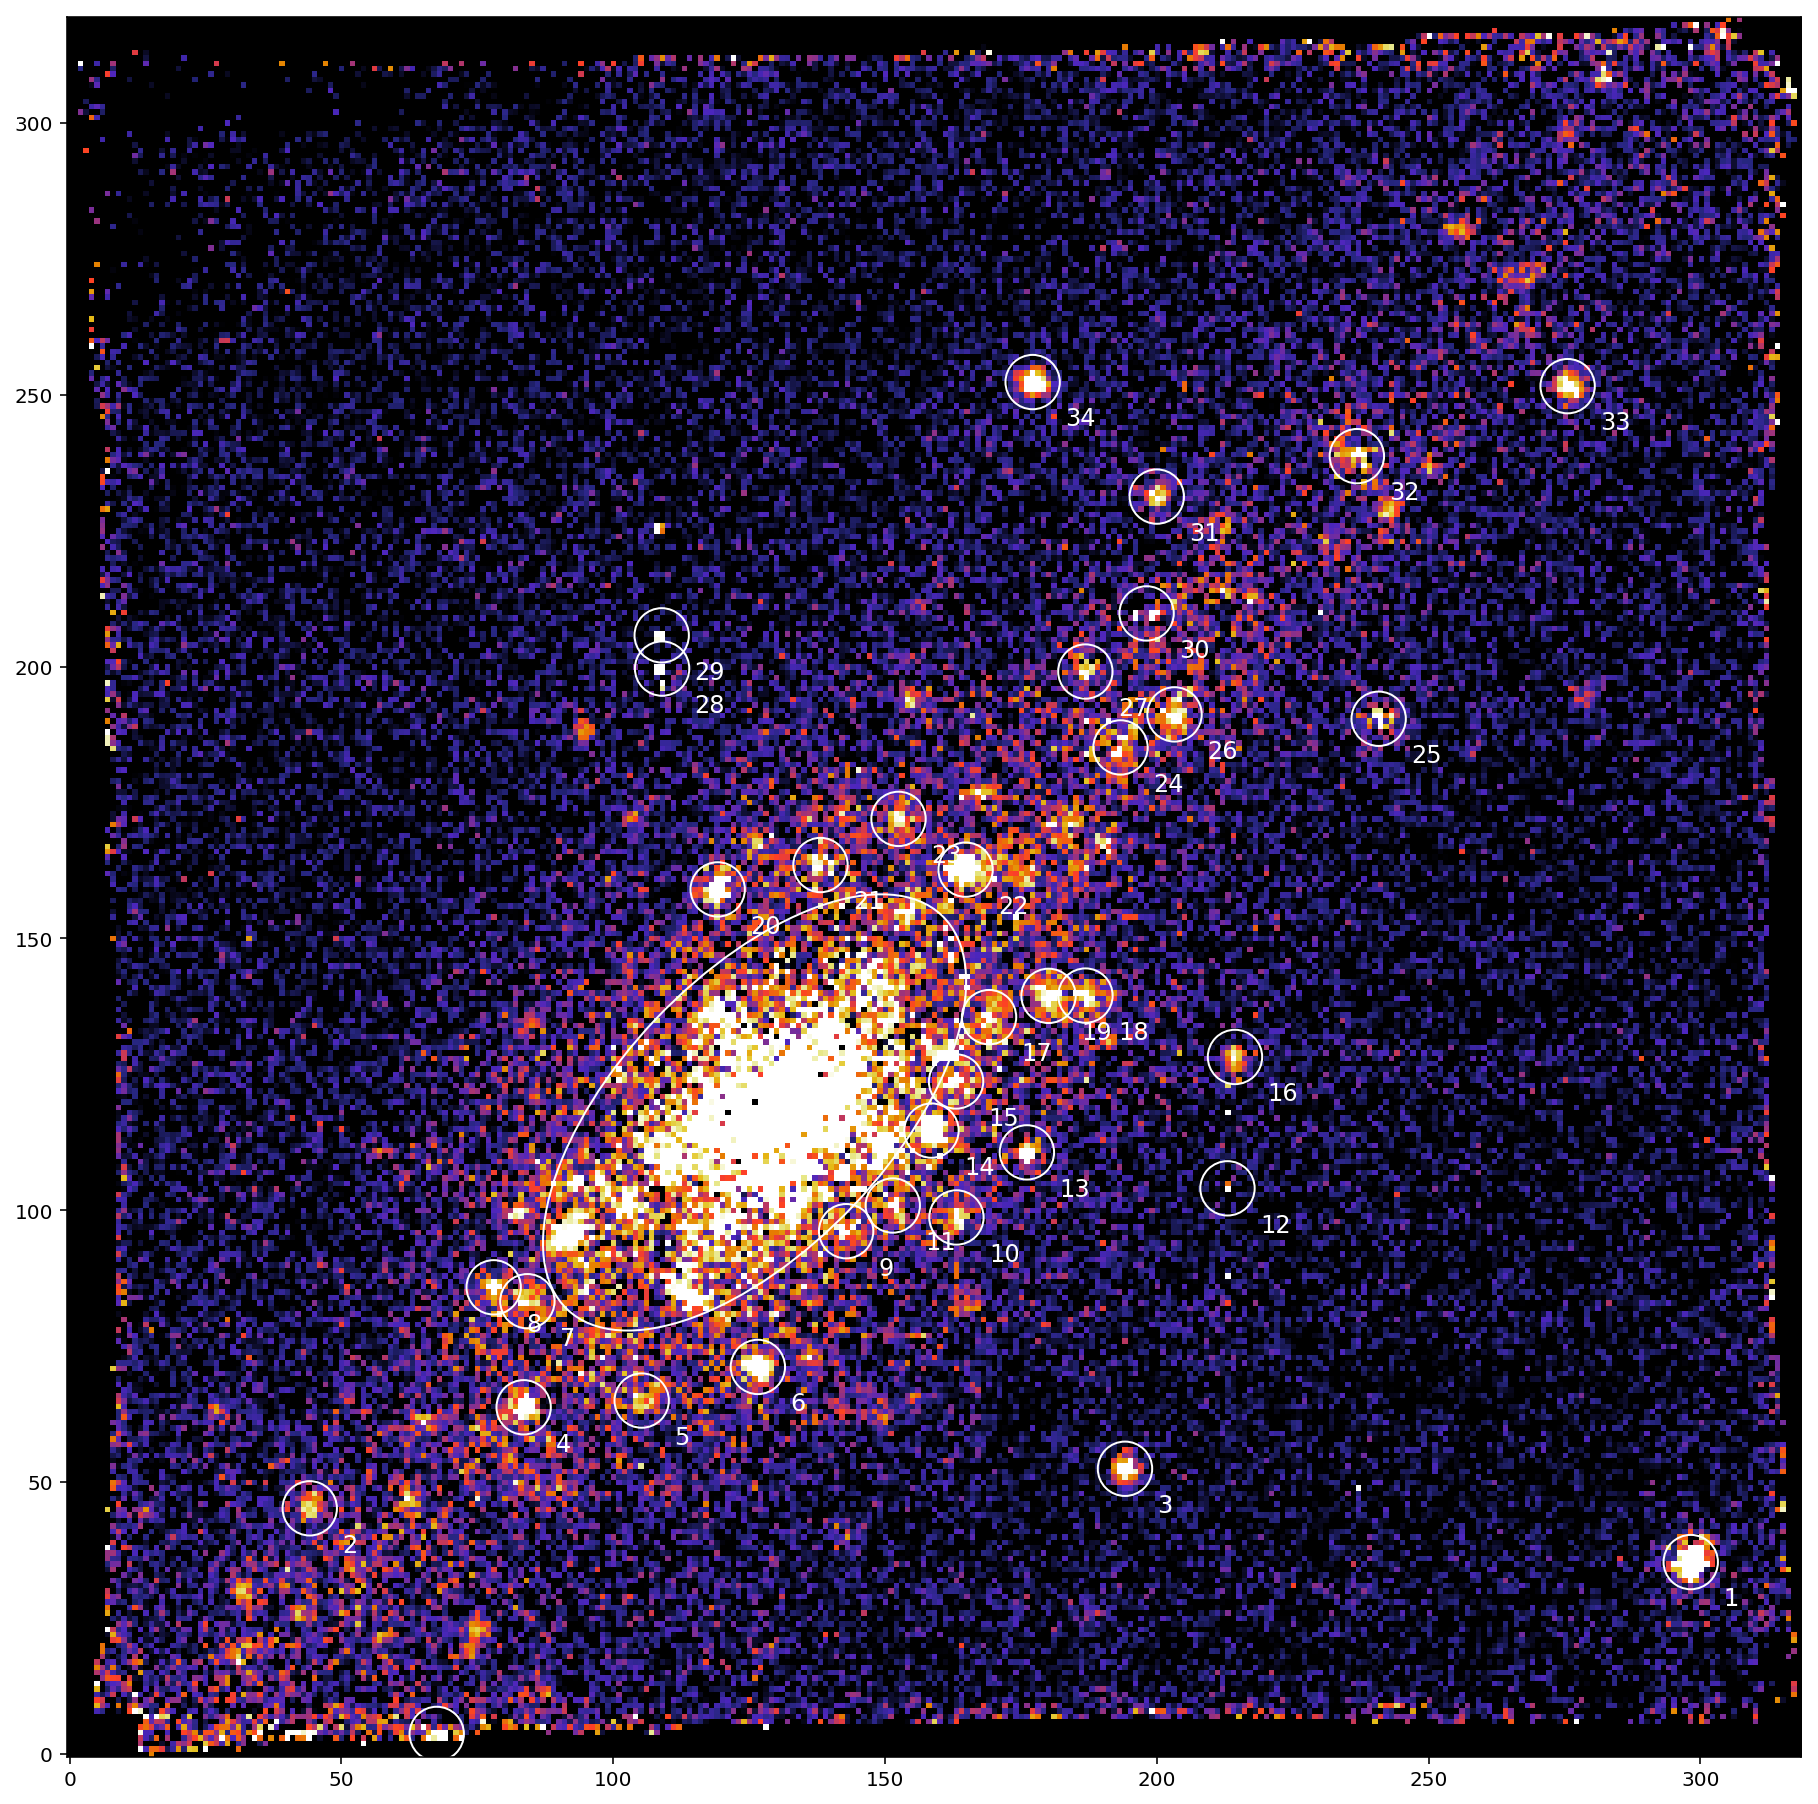

In [35]:
Y, X = np.mgrid[:y_data, :x_data]

width = 50
length = 100
xe = 126
ye = 118

alpha = -.76
elip_mask_gal = (((X-xe) * np.cos(alpha) + (Y-ye) * np.sin(alpha)) / (width/2)) ** 2 + (((X-xe) * np.sin(alpha) - (Y-ye) * np.cos(alpha)) / (length/2)) ** 2 <= 1
objects = sep.extract(gauss_F_shape, thresh=70.0, clean=False, mask=elip_mask_gal,)
x_sep = objects["x"]
y_sep = objects["y"]

positions = (x_sep, y_sep)
apertures = CircularAperture(positions, r=5)
plt.figure(figsize=(16,16))
plt.imshow(gauss_F_shape, origin="lower", cmap="CMRmap", vmin=10., vmax=100.)

ax = plt.gca()
elip_gal = Ellipse((xe, ye), width, length, angle=alpha*(180/np.pi), fill=False, color="white")
ax.add_artist(elip_gal)

apertures.plot(color="white")

x_y_list = [[x,y] for x,y in zip(x_sep, y_sep)]

ax = plt.gca()
#elip = Ellipse((y_loc,x_loc), wide, long, angle=137.0, fill=False, color="white")
#ax.add_artist(elip)

for i, item in enumerate(x_y_list):
    ax.annotate(i, (item[0]+6, item[1]-8), color="white", size=12)
    
#np.save("exported_data/FCC170/x_y_list_cen", x_y_list)

In [10]:
A_rN_shape[0,3]

7.363714209603927